Importing base packages

In [1]:
#standard packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#EPA workbench
from ema_workbench import (Model, Policy, ema_logging,
                           MultiprocessingEvaluator, save_results)

from problem_formulation import get_model_for_problem_formulation


In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

Creates functions the four main scenarios.
-Nothing happens
-Only dike height increases
-Only room for river
-The policy that came through the debate


In [3]:
#defines a function where no levers are applied
def base_case():
    return {l.name:0 for l in dike_model.levers}


policies = [Policy("base case", **base_case()),
            Policy("only heighting", **dict(base_case(),
                                            **{'A.1_DikeIncrease 0':10,
                                              'A.2_DikeIncrease 0':10,
                                              'A.3_DikeIncrease 0':10,
                                              'A.4_DikeIncrease 0':10,
                                              'A.5_DikeIncrease 0':10,})),
            Policy("only RfR", **dict(base_case(),
                                      **{'0_RfR 0':1,
                                         '1_RfR 0':1,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1,
                                         '4_RfR 0':1,
                                         })),
             Policy("Final policy debate", **dict(base_case(),
                                      **{

                                          #dike 1
                                          '0_RfR 0':1,
                                          'A.1_DikeIncrease 0':3,

                                         #dike 2
                                        'A.2_DikeIncrease 0':3,

                                          #dike 3
                                          'A.3_DikeIncrease 0':10,

                                          #dike 4
                                          '0_RfR 0':1,
                                          'A.4_DikeIncrease 0':3,

                                          #dike 5
                                          'A.5_DikeIncrease 0':10 }))]

In [4]:
n_scenarios = 500
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)


[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 500 scenarios * 4 policies * 1 model(s) = 2000 experiments
100%|██████████████████████████████████████| 2000/2000 [05:16<00:00,  6.32it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
save_results(results, 'results_open_exporationtest.csv')

[MainProcess/INFO] results saved successfully to C:\Users\lukas\OneDrive\Documents\GitHub\epa1361_open\final assignment\results_open_exporationtest.csv


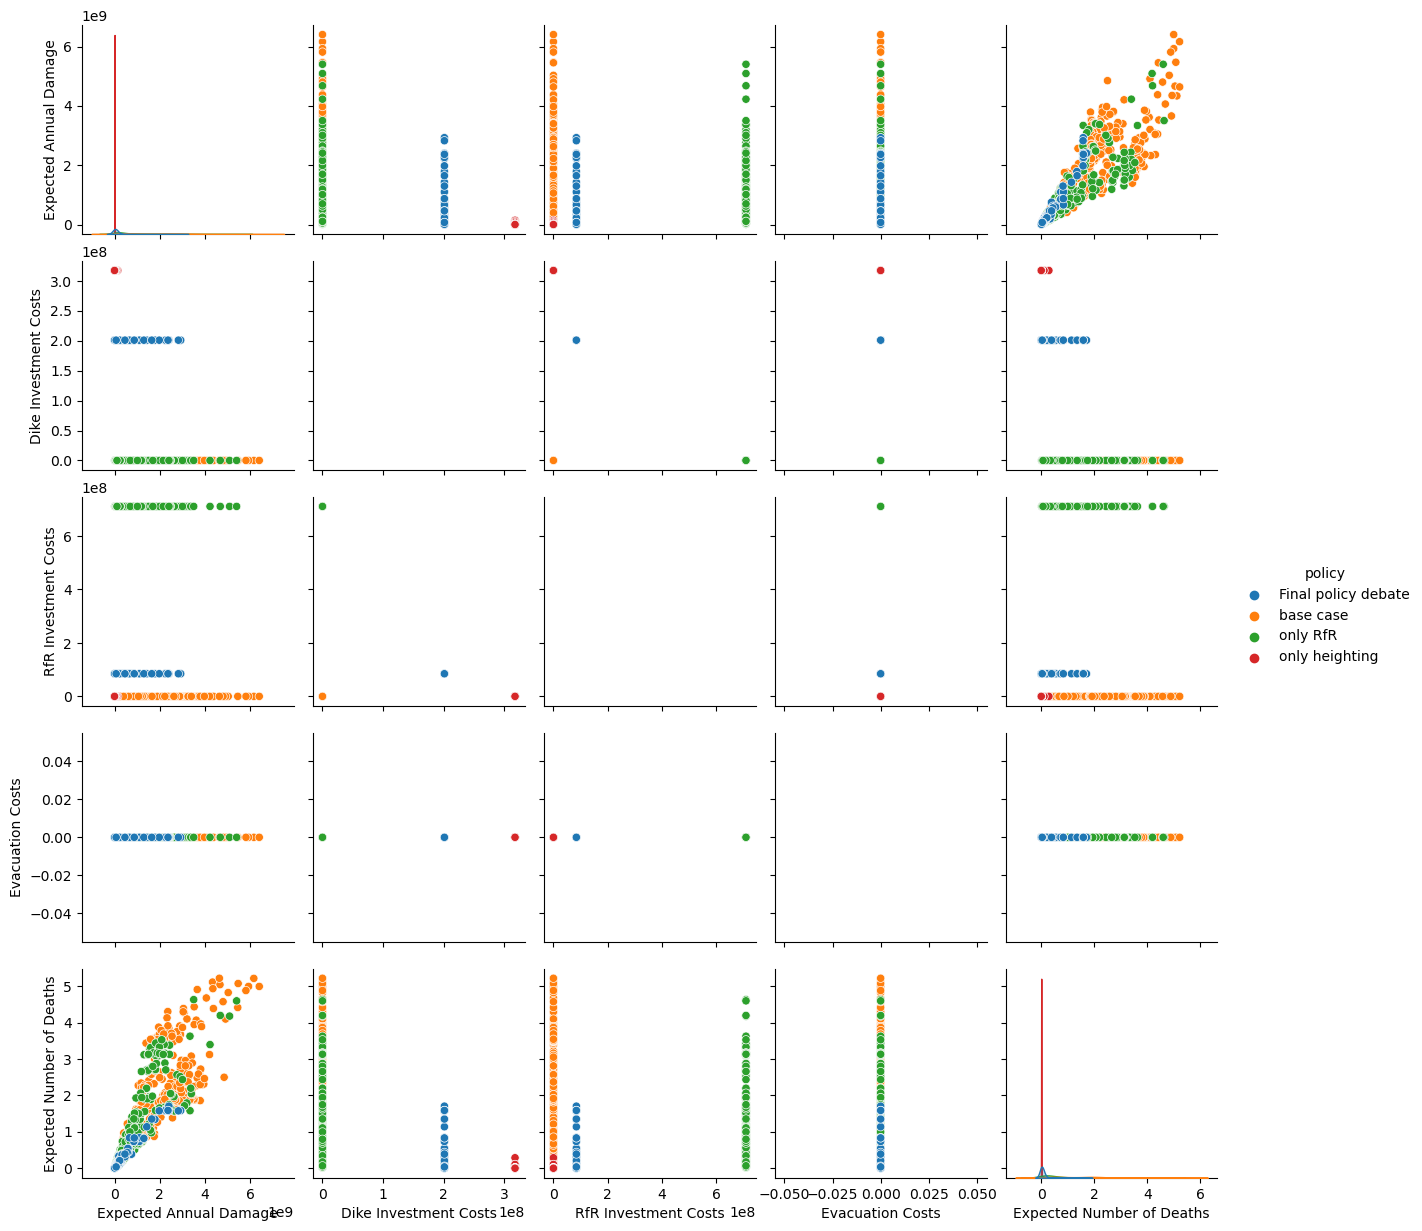

In [6]:
experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
plot.savefig("exploretest.png")
plt.show()

While the additional data per dike helps us to establish the situation for each individual

In [10]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [11]:
def base_case():
    return {l.name:0 for l in dike_model.levers}


policies = [Policy("base case", **base_case()),
            Policy("only heighting", **dict(base_case(),
                                            **{'A.1_DikeIncrease 0':10,
                                              'A.2_DikeIncrease 0':10,
                                              'A.3_DikeIncrease 0':10,
                                              'A.4_DikeIncrease 0':10,
                                              'A.5_DikeIncrease 0':10,})),
            Policy("only RfR", **dict(base_case(),
                                      **{'0_RfR 0':1,
                                         '1_RfR 0':1,
                                         '2_RfR 0':1,
                                         '3_RfR 0':1,
                                         '4_RfR 0':1,
                                         })),
             Policy("Final policy debate", **dict(base_case(),
                                      **{

                                          #dike 1
                                          '0_RfR 0':1,
                                          'A.1_DikeIncrease 0':3,

                                         #dike 2
                                        'A.2_DikeIncrease 0':3,

                                          #dike 3
                                          'A.3_DikeIncrease 0':10,

                                          #dike 4
                                          '0_RfR 0':1,
                                          'A.4_DikeIncrease 0':3,

                                          #dike 5
                                          'A.5_DikeIncrease 0':10 }))]

In [12]:
n_scenarios = 500
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 500 scenarios * 4 policies * 1 model(s) = 2000 experiments
100%|██████████████████████████████████████| 2000/2000 [05:03<00:00,  6.58it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
save_results(results, 'results_open_exporationtest_big.csv')


[MainProcess/INFO] results saved successfully to C:\Users\lukas\OneDrive\Documents\GitHub\epa1361_open\final assignment\results_open_exporationtest_big.csv


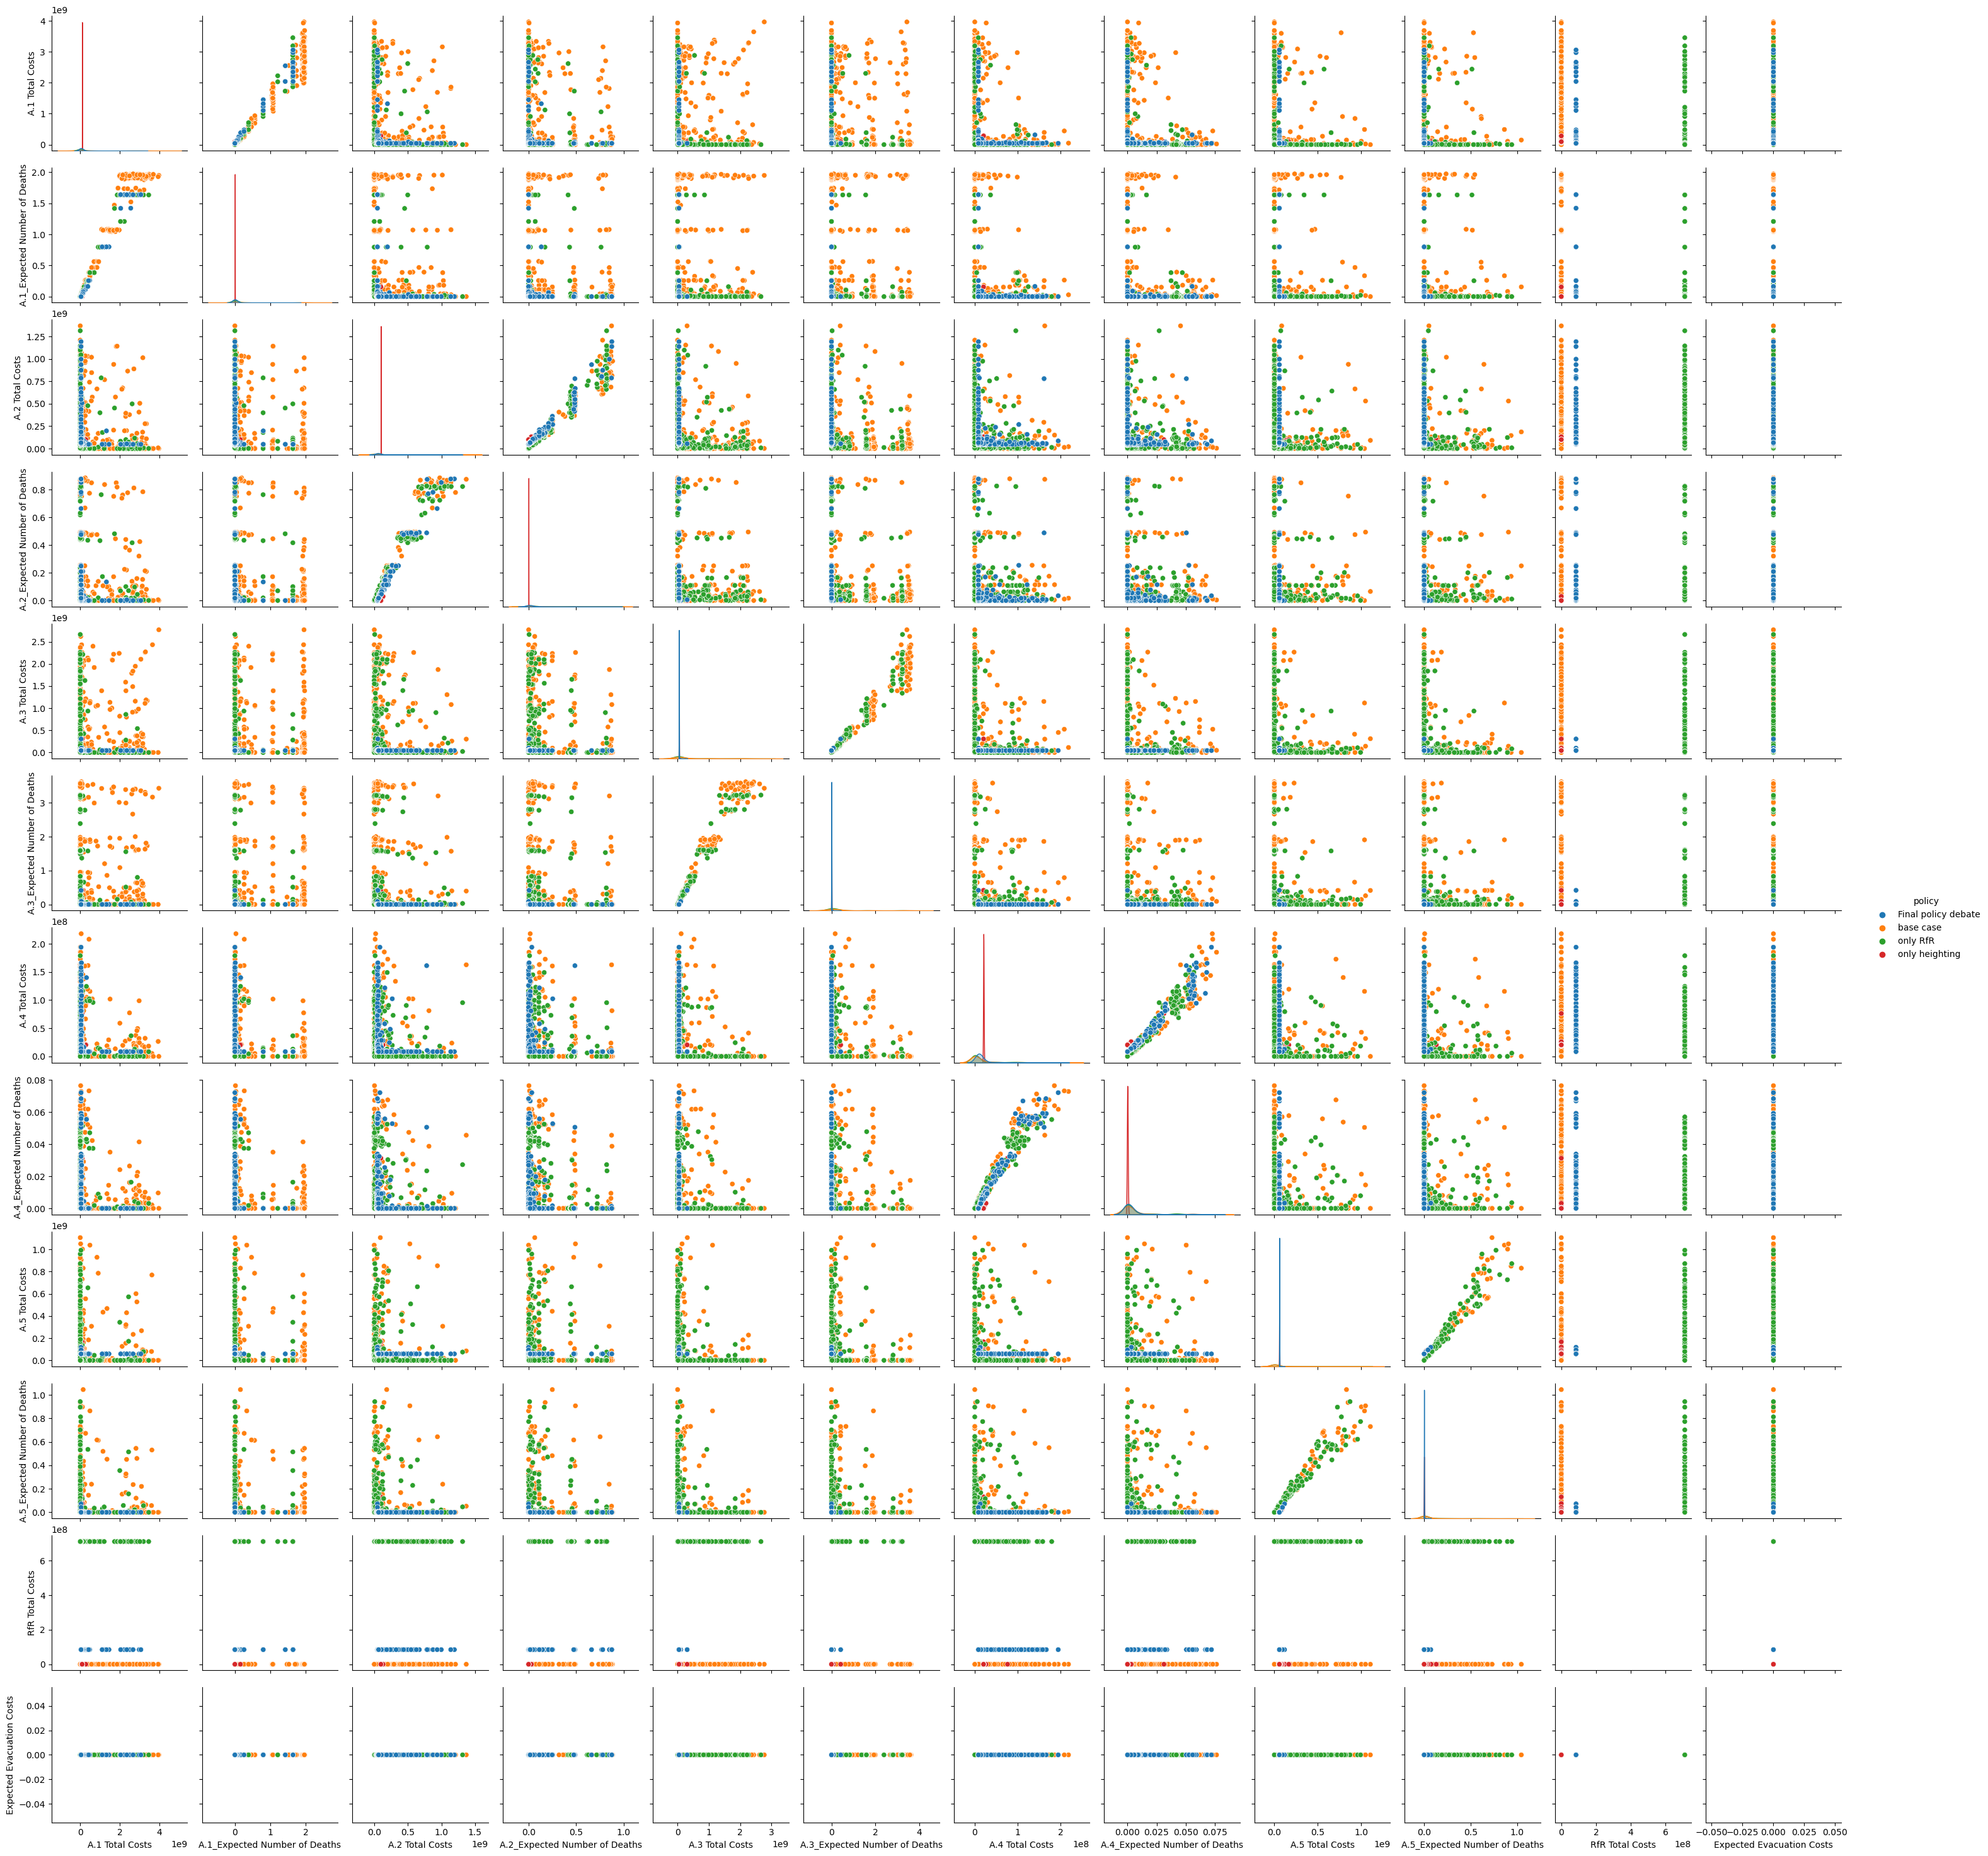

In [14]:
experiments, outcomes = results
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

plot = sns.pairplot(data, hue='policy', vars=outcomes.keys(), )
plot.savefig("exploretest.png")
plt.show()